### Import Libraries

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

### Load the Dataset

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Arrange Data into Features Matrix

In [4]:
features = ['petal length (cm)', 'petal width (cm)']

#Create Features Matrix
X = df.loc[:, features].values

#### The y data is for demonstrational purpose 

In [5]:
y = data.target

### Standardize the Data

In [6]:
#Apply Standardization to Features Matrix
X = df.loc[:, features].values

In [7]:
X = StandardScaler().fit_transform(X)

### Plot Data To Estimate Number of Cluster

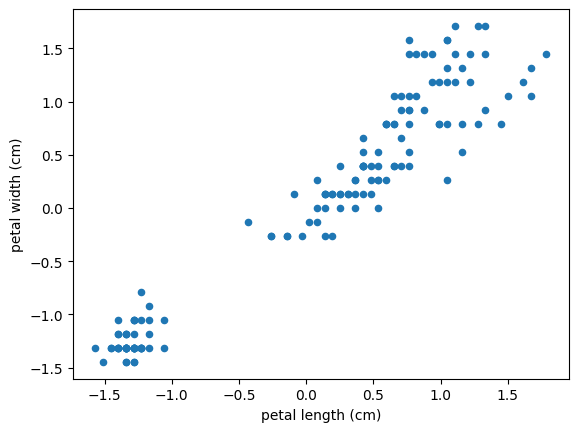

In [19]:
# Plot 
pd.DataFrame(X, columns = features).plot.scatter('petal length (cm)','petal width (cm)' )

# Add labels
plt.xlabel('petal length (cm)');
plt.ylabel('petal width (cm)');

### K-Means Clustering

In [10]:
#Make an Instance of K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

#Fit only on a features matrix
kmeans.fit(X)

KMeans(n_clusters=3, random_state=1)

In [11]:
#Get Labels and Cluster Centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Visually Evaluate the Clusters

In [13]:
X = pd.DataFrame(X, columns = features)

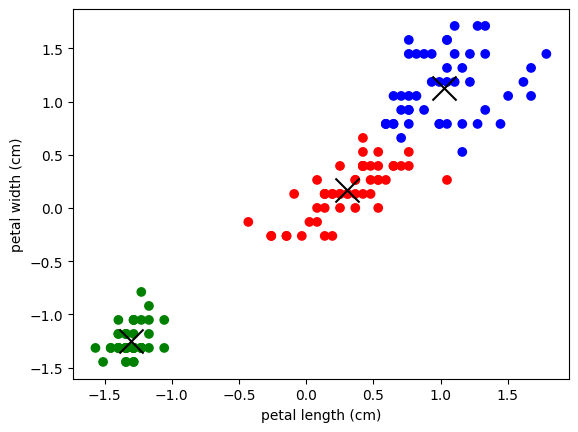

In [15]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');

### Visually Evaluate the Clusters and Compare Species

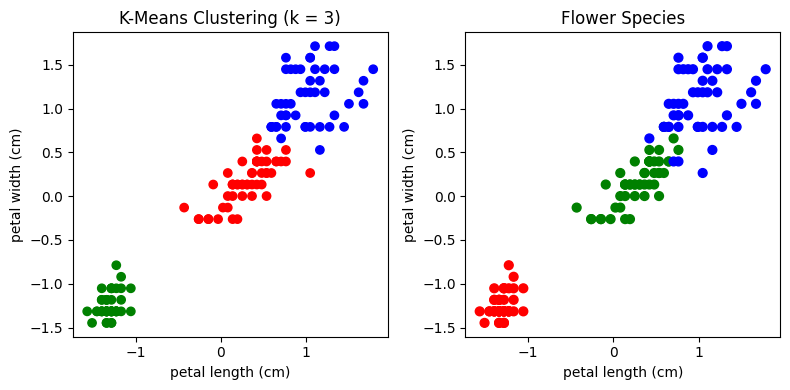

In [16]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[labels])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('K-Means Clustering (k = 3)')
 
plt.subplot(1, 2, 2)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[y], s=40)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('Flower Species')

plt.tight_layout()